### Regularización

Utilizaremos el dataset "Boston" que nos provee sklearn, el mismo contiene valores de propiedades en el estado de Boston.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Semántica de los datos

Cada registro de la base de datos describe un suburbio de Boston. Los datos se obtuvieron del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera (tomados del Repositorio de Aprendizaje Automático de UCI1):

 - CRIM: tasa de delincuencia per cápita
 - ZN: proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
 - INDUS: proporción de héctareas comerciales no minoristas por ciudad
 - CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
 - NOX: concentración de óxidos nítricos (partes por 10 millones)
 - RM: número medio de habitaciones por vivienda
 - AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
 - DIS: distancias ponderadas a cinco centros de empleo de Boston
 - RAD: índice de accesibilidad a carreteras radiales
 - TAX: tasa de impuesto a la propiedad de valor total por  10,000
 - PTRATIO: proporción alumno-maestro por ciudad
 - B: proporción de gente negra
 - LSTAT:% de menor estatus de la población
 - MEDV: Valor medio de las viviendas ocupadas por sus propietarios en 1000

#### Observaciones

 - Podemos ver en quién armó los datos una clara discriminación racial, incluyen como dato potencialmente relevante para el valor de la propiedad, la proporción de gente negra. Mas allá de si esto funciona bien como predictor nos va abriendo las puertas para uno de los temas que veremos hacia el final de la materia: Ética de la inteligencia artificial
 - Podemos ver que los atributos de entrada tienen una mezcla de unidades.

Veamos ahora como es la correlación de los features de este dataset

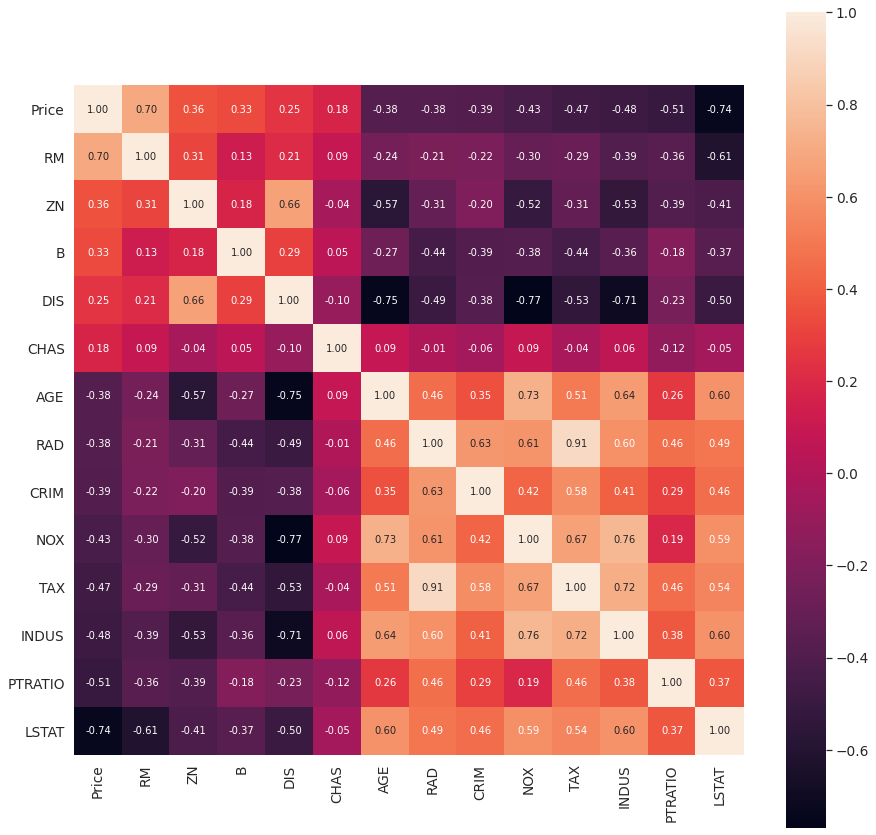

In [6]:

corrmat = boston_df.corr()
k = 14  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(boston_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

### Regresion OLS

Separemos nuestros datos en las variables independientes (X) y dependiente (y)

Comenzamos por hacer una regresión lineal para ver cual sería la performance sin regularización y que valor le asigna a cada feature. Para tener una buena estimación lo haremos mediante cross validation con un k-fold = 5

In [7]:
boston_df['Price'] = boston.target
X_train = boston_df.drop("Price", axis=1)
y_train = boston_df.filter(items=["Price"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(
        LinearRegression(), X_train, y_train, scoring="neg_mean_squared_error", cv=5
    )
)
rmse.mean()

5.828658946215802

In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_[0]

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [9]:

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
4,NOX,-17.766611
7,DIS,-1.475567
10,PTRATIO,-0.952747
12,LSTAT,-0.524758
0,CRIM,-0.108011
9,TAX,-0.012335
6,AGE,0.000692
11,B,0.009312
2,INDUS,0.020559
1,ZN,0.046420


Text(0.5, 1.0, 'Coeficientes en el Modelo Ridge ')

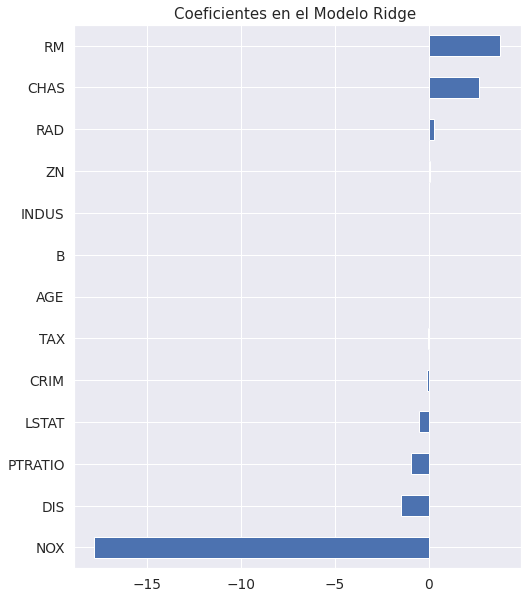

In [10]:
coef = pd.Series(linreg.coef_[0], index=X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Ridge ")

### Ridge
Ahora procederemos a escalar los datos mediante el cálculo visto en la teórica

In [11]:

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

scaler.fit(boston_df)
scaled_df = scaler.transform(boston_df)
names = boston_df.columns
scaled_boston_df = pd.DataFrame(scaled_df, columns=names)

In [12]:
scaled_boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


Volvemos a hacer split de la data poque ahor queremos trabajar con nuestro datos escalados

In [13]:
X_train = scaled_boston_df.drop("Price", axis=1)
y_train = boston_df.filter(items=["Price"])

Ahora definiremos una nueva función para calcular el RMSE de un modelo mediante cross validation con un k-fold de 5

In [14]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(
        -cross_val_score(
            model, X_train, y_train, scoring="neg_mean_squared_error", cv=5
        )
    )
    return rmse

Comenzaremos por ajustar nuestra regresión mediante Ridge, probaremos con distintos valores de alpha y luego graficaremos el error (RMSE) en función de alpha

In [15]:
alphas = [
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
    0.3,
    1,
    3,
    5,
    10,
    30,
    50,
    55,
    75,
    100,
    120,
    150,
]
cv_ridge = [rmse_cv(Ridge(alpha=alpha), X_train, y_train).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

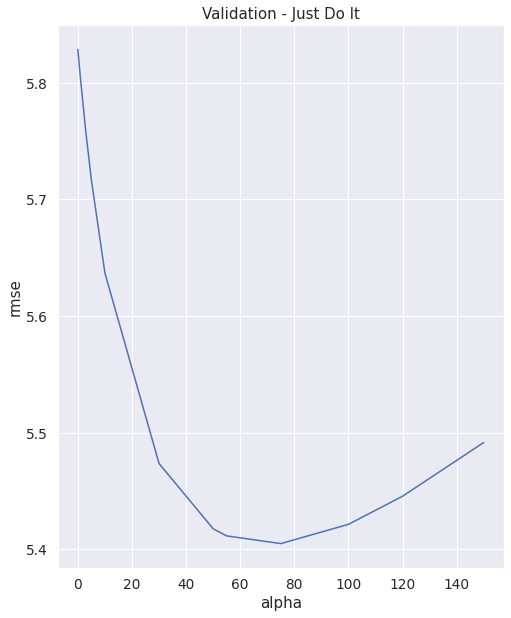

In [16]:
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [17]:
cv_ridge.min()

5.404889081206123

Podemos ver que el error alcanza un mínimo de 5.4 con un alpha alrrededor de 80, mas precisamente 75 según el array de alphas que cargamos

In [18]:
ridge = Ridge(alpha=75)
ridge.fit(X_train, y_train)


coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': ridge.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
12,LSTAT,-3.103298
7,DIS,-1.901767
10,PTRATIO,-1.725036
4,NOX,-1.058257
9,TAX,-0.690098
0,CRIM,-0.680921
2,INDUS,-0.366823
6,AGE,-0.154609
1,ZN,0.628929
3,CHAS,0.742817


Text(0.5, 1.0, 'Coeficientes en el Modelo Ridge ')

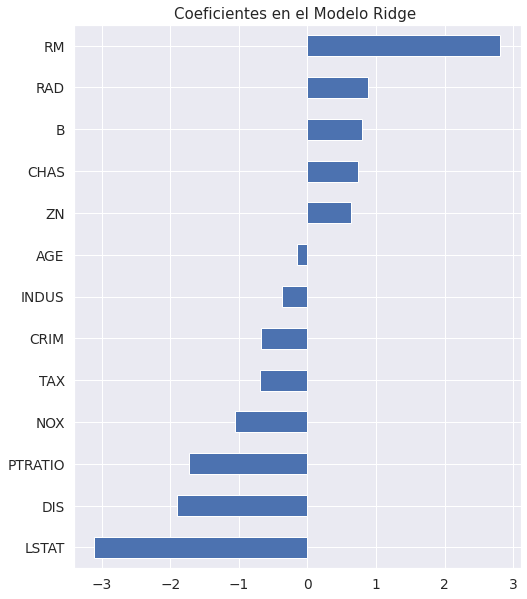

In [19]:
coef = pd.Series(ridge.coef_[0], index=X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Ridge ")

### Lasso

Veamos ahora como se ajusta mediante Lasso

In [20]:
alphas = [
    0.0000001,
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
    0.3,
    1,
    3,
    5,
    10,
    30,
    50,
    55,
]
cv_lasso = [rmse_cv(Lasso(alpha=alpha), X_train, y_train).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

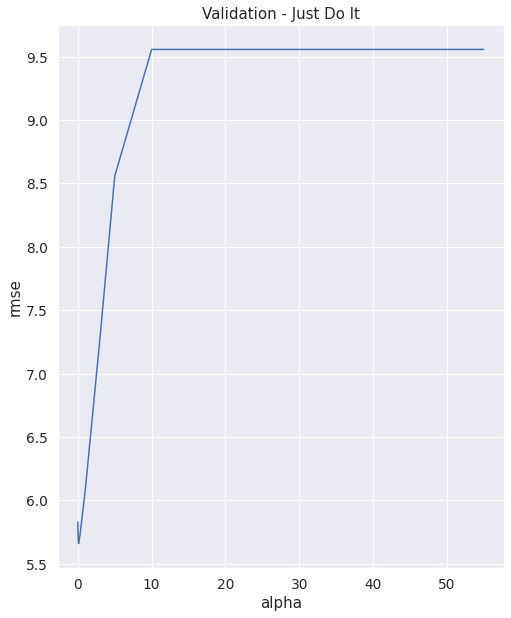

In [21]:
cv_lasso_serie = pd.Series(cv_lasso, index=alphas)
cv_lasso_serie.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

¿Por qué el error crece tanto más rápido que Ridge?

In [22]:
cv_lasso_serie.min()

5.6576886883008175

In [23]:
model_lasso = Lasso(alpha=np.array(alphas)[cv_lasso == cv_lasso_serie.min()])
model_lasso.fit(X_train, y_train)

Lasso(alpha=array([0.1]))

Dado que Lasso tiende a anular totalmente algunos coeficientes, podemos ver cuantas y cuales de nuestros coeficientes fueron anulados y por lo tanto, cuales variables pueden ser prescindibles para este ajuste

In [24]:
coef = pd.Series(model_lasso.coef_, index=X_train.columns)
print(
    "Lasso seleccionó "
    + str(sum(coef != 0))
    + " variables y eliminó las otras "
    + str(sum(coef == 0))
    + " variables"
)

Lasso seleccionó 11 variables y eliminó las otras 2 variables


Text(0.5, 1.0, 'Coeficientes en el Modelo Lasso ')

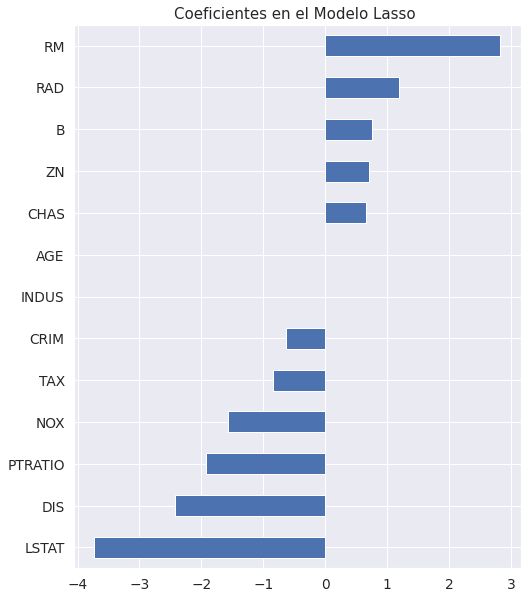

In [25]:
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Lasso ")

Vemos que le dió un valor mucho mas chico a AGE con respecto a Ridge aunque no llegó a eliminarla del todo.

¿A que puede deberse esto?

Ya que Lasso regulariza mucho más "rapido" que Ridge, hagamos foco en los landas mas chicos para ver que pasa

In [26]:
alphas = [
    0.0000001,
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.005,
    0.1,
    0.3,
    1,
]
cv_lasso = [rmse_cv(Lasso(alpha=alpha), X_train, y_train).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

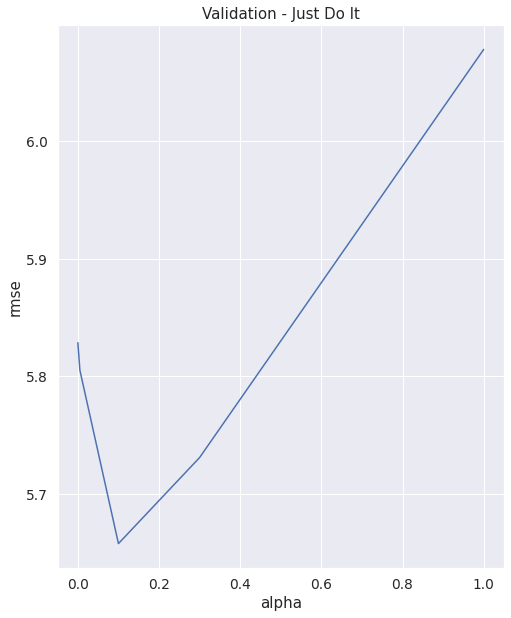

In [27]:
cv_lasso_serie = pd.Series(cv_lasso, index=alphas)
cv_lasso_serie.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Podemos ver que para un landa de 0.4 el error es casi el mismo que aplicar OLS, chequemoslo

In [28]:

model_lasso = Lasso(alpha=0.4)
rmse_cv(model_lasso, X_train, y_train).mean()

5.800935596708098

El error es parecido, sin embargo es un poco mas bajo que con OLS.

¿Que habrá pasado ahora con los coeficientes de las variables?

In [29]:
model_lasso.fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_, index=X_train.columns)
print(
    "Lasso seleccionó "
    + str(sum(coef != 0))
    + " variables y eliminó las otras "
    + str(sum(coef == 0))
    + " variables"
)

Lasso seleccionó 8 variables y eliminó las otras 5 variables


Text(0.5, 1.0, 'Coeficientes en el Modelo Lasso ')

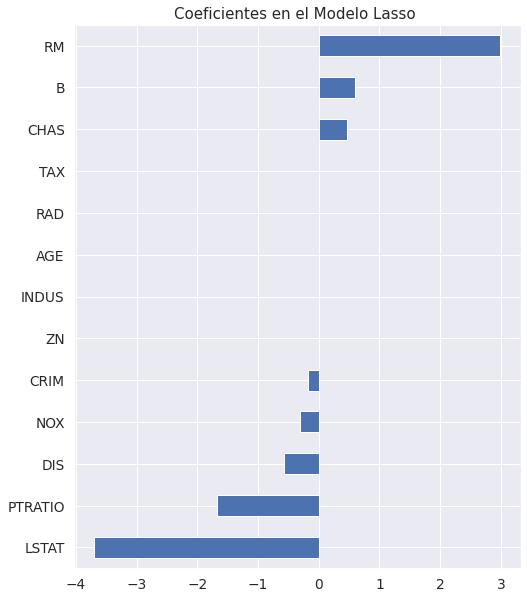

In [30]:
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Lasso ")

Que sucede si artificialmente creamos una nueva columna correlacionada linealmente con otra?

In [31]:
X_train['new_col'] = X_train['RM'] * 2

In [32]:
alphas = [0.4]
cv_lasso = [rmse_cv(Lasso(alpha=alpha), X_train, y_train).mean() for alpha in alphas]
cv_lasso_serie.min()

5.6576886883008175

In [33]:
cv_lasso_serie = pd.Series(cv_lasso, index=alphas)
model_lasso = Lasso(alpha=np.array(alphas)[cv_lasso == cv_lasso_serie.min()])
model_lasso.fit(X_train, y_train)

Lasso(alpha=array([0.4]))

In [34]:
coef = pd.Series(model_lasso.coef_, index=X_train.columns)
print(
    "Lasso seleccionó "
    + str(sum(coef != 0))
    + " variables y eliminó las otras "
    + str(sum(coef == 0))
    + " variables"
)

Lasso seleccionó 8 variables y eliminó las otras 6 variables


Text(0.5, 1.0, 'Coeficientes en el Modelo Lasso ')

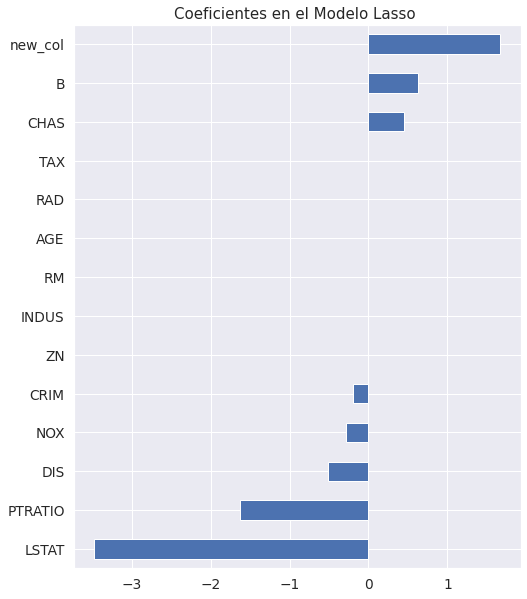

In [35]:
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Lasso ")

Podemos ver que ahora elimina 3 variables, dado que la nueva que generamos esta correlacionada con la RM.

También podemos ver que en vez de eliminar nuestra nueva  variable elimina la original.....

¿Porque podrá ser esto?

### Elastic Net

Veamos ahora como ajusta Elastic Net

In [36]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5]

cv_elasticNet = [
    rmse_cv(ElasticNet(alpha=alpha, l1_ratio=0.5), X_train, y_train).mean()
    for alpha in alphas
]

Text(0, 0.5, 'rmse')

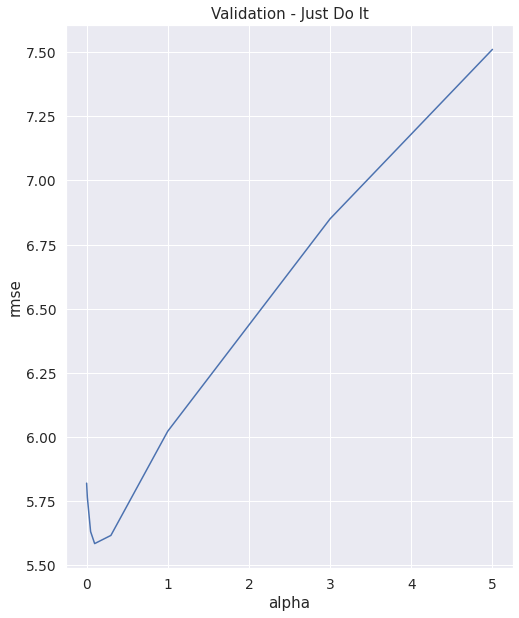

In [37]:
cv_elasticNet = pd.Series(cv_elasticNet, index=alphas)
cv_elasticNet.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [38]:
cv_elasticNet.min()

5.585166277280107

In [39]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': elastic.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
12,LSTAT,-3.346407
7,DIS,-2.212799
10,PTRATIO,-1.818843
4,NOX,-1.365284
9,TAX,-0.810919
0,CRIM,-0.677032
2,INDUS,-0.151684
6,AGE,-0.049673
5,RM,0.218371
1,ZN,0.672976


Text(0.5, 1.0, 'Coeficientes en el Modelo Ridge ')

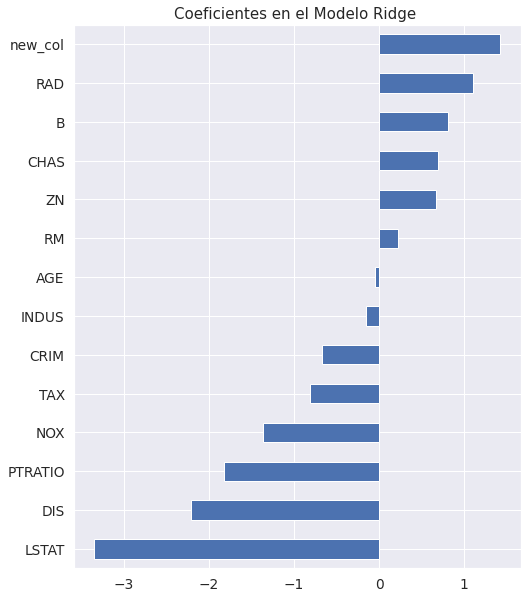

In [40]:
coef = pd.Series(elastic.coef_, index=X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Ridge ")

Veamos que pasa si al l1_ratio lo llevamos a 1

In [41]:
elastic = ElasticNet(alpha=0.4, l1_ratio=1)
elastic.fit(X_train, y_train)

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': elastic.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
12,LSTAT,-3.469780
10,PTRATIO,-1.625595
7,DIS,-0.518514
4,NOX,-0.280412
0,CRIM,-0.196546
1,ZN,0.000000
2,INDUS,-0.000000
5,RM,0.000000
6,AGE,-0.000000
8,RAD,-0.000000


Text(0.5, 1.0, 'Coeficientes en el Modelo Ridge ')

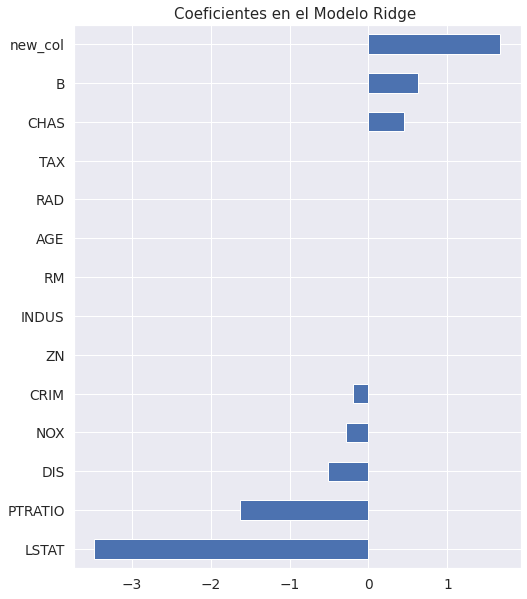

In [42]:
coef = pd.Series(elastic.coef_, index=X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Ridge ")

Obtenemos la misma estimación que para Lasso